In [70]:
import torch
import torchode as to
from matplotlib import pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [71]:
device

device(type='cuda', index=0)

In [126]:
values = 
[1,0.0179,0.6,0.610936,0.0174319,0.00659973,
2,0.0073,0.6,0.626729,0.00715554,0.00280958,
3,0.0154,0.6,0.641558,0.0150136,0.00598728,
4,0.0102,0.6,0.658861,0.00997627,0.0041075,
5,0.0048,0.6,0.669326,0.00471155,0.00198099,
6,0.0125,0.6,0.681751,0.0122033,0.00518898,
7,0.0382,0.6,0.720427,0.0365676,0.0160499,
8,0.0118,0.6,0.761273,0.0115145,0.00547605,
9,0.02,0.6,0.78936,0.01938,0.00949442,
10,0.0761,0.6,0.885895,0.0698118,0.0367623,
11,0.0105,0.6,0.984849,0.0102317,0.00631726,
12,0.0024,0.6,1.00129,0.00235772,0.00148751,
13,0.0054,0.6,1.01146,0.00528835,0.00336453,
14,0.0128,0.6,1.03585,0.0124355,0.00806938,
15,0.0038,0.6,1.05875,0.0037269,0.00248477,
16,0.0058,0.6,1.07239,0.00567568,0.00382896,
17,0.0288,0.6,1.1242,0.0274294,0.0191865,
18,0.0124,0.6,1.19,0.0120284,0.00898637,
19,0.0047,0.6,1.2191,0.00460156,0.00353355,
20,0.0015,0.6,1.22993,0.00147441,0.00114365,
21,0.1693,0.6,1.6275,0.120076,0.124569,
22,0.0022,0.6,2.15793,0.00215608,0.00293962,
23,0.0059,0.6,2.19153,0.00573395,0.00795842,
24,0.0107,0.6,2.26291,0.0102781,0.014787,
25,0.0606,0.6,2.62226,0.0500482,0.0891161,
26,0.0067,0.6,3.02126,0.00646244,0.012443,
27,0.002,0.6,3.08096,0.00195725,0.00381669,
28,0.001,0.6,3.102,0.00098168,0.00192448,
29,0.0319,0.6,3.3525,0.0280031,0.063044,
30,0.0246,0.6,3.84732,0.0218975,0.0564836,
31,0.0042,0.6,4.13998,0.00406307,0.0107318]

In [127]:
rivalries = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,
0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,
0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,
0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,
0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,
0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,
0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,
0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,
0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0]

In [128]:
values = torch.Tensor(values).reshape(31,6)
split_values = torch.hsplit(values,6)

c=torch.squeeze(split_values[3]).to(device)
m=0.6
#r_rand = torch.randint(0,2,(31,31))
#r_upper = torch.triu(r_rand, diagonal=1)
#r = ((r_upper + r_upper.T).type(torch.FloatTensor)).to(device)
r = torch.Tensor(rivalries).reshape(31,31).to(device)

In [267]:
print(c)

tensor([0.3042, 0.4991, 0.2865, 0.6845, 0.6229, 0.0445, 0.4724, 0.3759, 0.2733,
        0.0850, 0.6621, 0.3327, 0.9774, 0.2078, 0.9811, 0.9788, 0.7185, 0.5114,
        0.7672, 0.8386, 0.3094, 0.0118, 0.5017, 0.2348, 0.9227, 0.8445, 0.4958,
        0.2026, 0.1736, 0.2388, 0.2872], device='cuda:0')


In [299]:
def dpdt_paper(t,p,args):
    c = args[0]
    m = args[1]
    sum_previous = torch.cumsum(torch.squeeze(p),dim=0)
    sum_previous = torch.cat((torch.tensor([0]).to(device),sum_previous[0:-1]))
    
    sum_prev_cp = torch.cumsum(torch.squeeze(c*p),dim=0)
    sum_prev_cp = torch.cat((torch.tensor([0]).to(device),sum_prev_cp[0:-1]))
    
    dpdt = c*p*(1-p-sum_previous) - (m*p) - (sum_prev_cp*p)

    return(dpdt)

In [ ]:
def dpdt_rivalry(t,p,args):
    c = args[0]
    m = args[1]
    r=args[2]

    sum_previous = torch.cumsum(torch.squeeze(p),dim=0)
    sum_previous = torch.cat((torch.tensor([0]).to(device),sum_previous[0:-1]))
    
    sum_rival_c = r * torch.squeeze(p) * c
    sum_rival_c = torch.cumsum(sum_rival_c,1)
    sum_rival_c = torch.cat((torch.zeros(31,1).to(device),sum_rival_c[:,:-1]),dim=1)
    sum_rival_previous_c = torch.diag(sum_rival_c)
    sum_rival_following_c = torch.sum(sum_rival_c,1) - sum_rival_previous_c
    
    dpdt = c*p*(1-p-sum_previous) - (m*p) - (sum_rival_previous_c*p) - (sum_rival_following_c * p * m)

    return(dpdt)

{'n_f_evals': tensor([668]), 'n_steps': tensor([111], device='cuda:0'), 'n_accepted': tensor([104], device='cuda:0'), 'n_initialized': tensor([10000], device='cuda:0')}


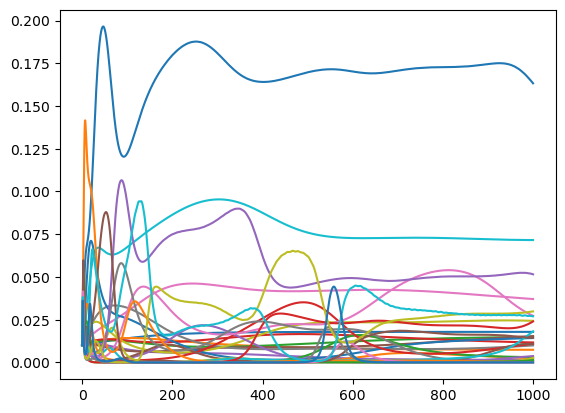

In [129]:
#No Rivalries

p0 = 0.01 * torch.ones(31)
p0 = p0[None,:].to(device)
n_steps = 10000
t_eval = torch.linspace(0, 1000, n_steps)
t_eval = t_eval[None,:].to(device)

term = to.ODETerm(dpdt_paper,with_args=True)
step_method = to.Dopri5(term=term)
step_size_controller = to.IntegralController(atol=1e-6, rtol=1e-3, term=term)
solver = to.AutoDiffAdjoint(step_method, step_size_controller)
jit_solver = torch.compile(solver)

sol = jit_solver.solve(to.InitialValueProblem(t_eval=t_eval,y0=p0),args=(c,m))
print(sol.stats)

plt.plot(sol.ts[0].cpu().detach().numpy(), sol.ys[0].cpu().detach().numpy()) ;

{'n_f_evals': tensor([4274]), 'n_steps': tensor([712], device='cuda:0'), 'n_accepted': tensor([679], device='cuda:0'), 'n_initialized': tensor([10000], device='cuda:0')}


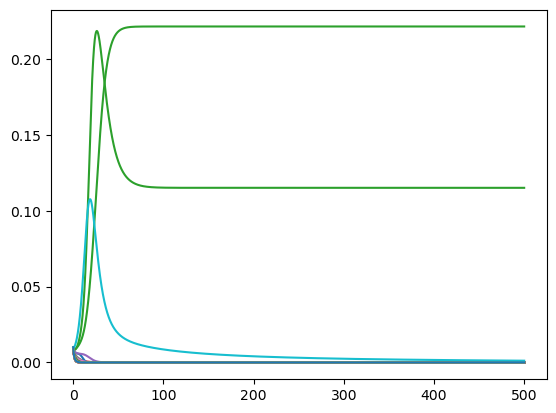

In [175]:
#Rivalries

p0 = 0.01 * torch.ones(31)
p0 = p0[None,:].to(device)
n_steps = 10000
t_eval = torch.linspace(0, 500, n_steps)
t_eval = t_eval[None,:].to(device)

term = to.ODETerm(dpdt_rivalries,with_args=True)
step_method = to.Dopri5(term=term)
step_size_controller = to.IntegralController(atol=1e-6, rtol=1e-3, term=term)
solver = to.AutoDiffAdjoint(step_method, step_size_controller)
jit_solver = torch.compile(solver)

sol = jit_solver.solve(to.InitialValueProblem(t_eval=t_eval,y0=p0),args=(c,m,r))
print(sol.stats)

plt.plot(sol.ts[0].cpu().detach().numpy(), sol.ys[0].cpu().detach().numpy()) ;

In [141]:
torch.sort(sol.ys[0][-1])
top_6 = 0
for i in range(6):
    top_6 += torch.sort(sol.ys[0][-1])[0][-(i+1)]
print(top_6)

tensor(0.6943, device='cuda:0')


In [300]:
from tqdm import tqdm

solutions = []
for i in tqdm(range(100)):
    c=torch.rand(31).to(device)
    m=0.6
    r_rand = torch.randint(0,2,(31,31))
    r_upper = torch.triu(r_rand, diagonal=1)
    r = ((r_upper + r_upper.T).type(torch.FloatTensor)).to(device)
    
    p0 = 0.01 * torch.ones(31)
    p0 = p0[None,:].to(device)
    n_steps = 1000
    t_eval = torch.linspace(0, 1000, n_steps)
    t_eval = t_eval[None,:].to(device)
    
    term = to.ODETerm(dpdt_paper,with_args=True)
    step_method = to.Dopri5(term=term)
    step_size_controller = to.IntegralController(atol=1e-6, rtol=1e-3, term=term)
    solver = to.AutoDiffAdjoint(step_method, step_size_controller)
    jit_solver = torch.compile(solver)
    
    sol = jit_solver.solve(to.InitialValueProblem(t_eval=t_eval,y0=p0),args=(c,m,r))
    
    solutions.append((sol.ys[0][-1],sum(r),c))


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:23<00:00,  1.20it/s]


In [301]:
area = []
for i in range(len(solutions)):
    area.append(solutions[i][0])

In [302]:
competetiveness = []
for i in range(len(solutions)):
    competetiveness.append(np.arange(31))

In [303]:
import numpy as np
area = [t.cpu().numpy() for t in area]
area = np.array(area)


In [304]:
area.reshape(3100)
competetiveness = np.array(competetiveness)
competetiveness.reshape(3100)

array([ 0,  1,  2, ..., 28, 29, 30])

In [297]:
z=np.polyfit(competetiveness, area, 1)
competetiveness_fit = np.poly1d(z)

TypeError: expected 1D vector for x

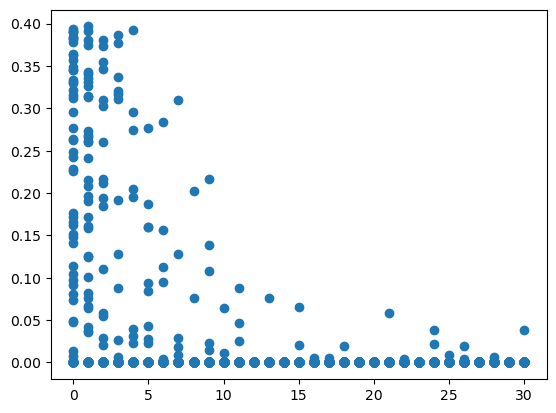

In [305]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 1, 100)
plt.scatter(competetiveness,area)
plt.show()

In [ ]:
from tqdm import tqdm

solutions = []
for i in tqdm(range(100)):
    c=torch.rand(31).to(device)
    m=0.6
    r_rand = torch.randint(0,2,(31,31))
    r_upper = torch.triu(r_rand, diagonal=1)
    r = ((r_upper + r_upper.T).type(torch.FloatTensor)).to(device)
    
    def dpdt_paper(t,p,args):
        c = args[0]
        m = args[1]
        r=args[2]
    
        sum_previous = torch.cumsum(torch.squeeze(p),dim=0)
        sum_previous = torch.cat((torch.tensor([0]).to(device),sum_previous[0:-1]))
        
        sum_rival_c = r * torch.squeeze(p) * c
        sum_rival_c = torch.cumsum(sum_rival_c,1)
        sum_rival_c = torch.cat((torch.zeros(31,1).to(device),sum_rival_c[:,:-1]),dim=1)
        sum_rival_previous_c = torch.diag(sum_rival_c)
        sum_rival_following_c = torch.sum(sum_rival_c,1) - sum_rival_previous_c
    
        dpdt = c*p*(1-p-sum_previous) - (m*p) - (sum_rival_previous_c*p) - (sum_rival_following_c * p * m)
    
        return(dpdt)
    
    p0 = 0.01 * torch.ones(31)
    p0 = p0[None,:].to(device)
    n_steps = 1000
    t_eval = torch.linspace(0, 1000, n_steps)
    t_eval = t_eval[None,:].to(device)
    
    term = to.ODETerm(dpdt_paper,with_args=True)
    step_method = to.Dopri5(term=term)
    step_size_controller = to.IntegralController(atol=1e-6, rtol=1e-3, term=term)
    solver = to.AutoDiffAdjoint(step_method, step_size_controller)
    jit_solver = torch.compile(solver)
    
    sol = jit_solver.solve(to.InitialValueProblem(t_eval=t_eval,y0=p0),args=(c,m,r))
    
    solutions.append((sol.ys[0][-1],sum(r),c))
